## 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [3]:
GRAB = pd.read_csv("/content/drive/MyDrive/GRAB.csv")

In [4]:
GRAB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
...,...,...,...,...,...,...,...
502,2023-11-30,3.020,3.094,3.00,3.04,3.04,50506600
503,2023-12-01,3.040,3.120,3.04,3.07,3.07,23317000
504,2023-12-04,3.090,3.185,3.08,3.15,3.15,25401800
505,2023-12-05,3.120,3.165,3.10,3.14,3.14,18192800


## 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [5]:
# Drop missing values
GRAB = GRAB.dropna()
# Reset the index
GRAB = GRAB.reset_index(drop=True)

### Chuyển dữ liệu cột Close sang dạng float

In [6]:
GRAB["Close"]=GRAB["Close"].astype(float)

## 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

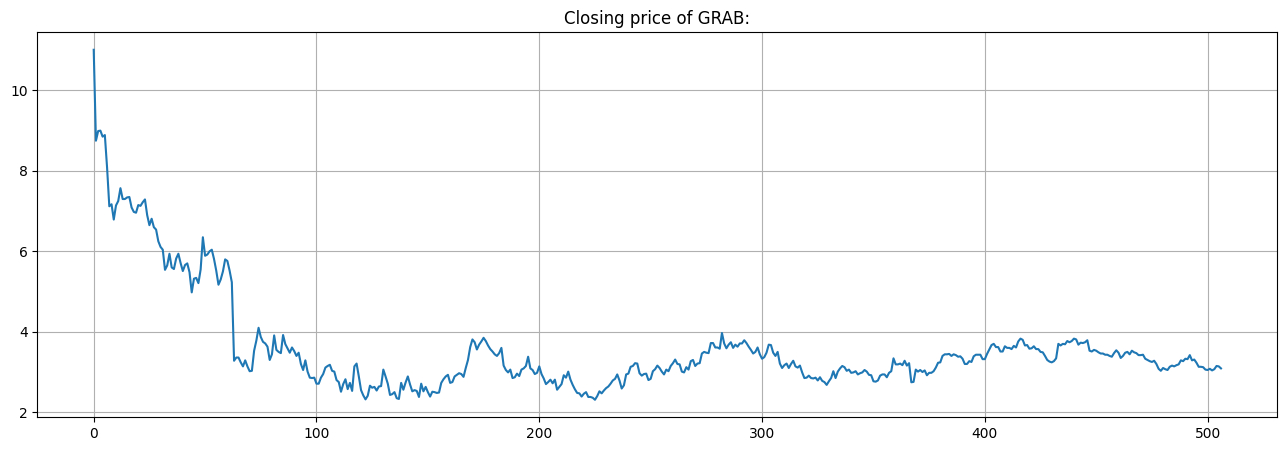

In [7]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(GRAB["Close"])
plt.title('Closing price of GRAB:')
plt.grid(True)
plt.show()

## 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(GRAB))
test_size = int(0.3 * len(GRAB))
val_size = len(GRAB) - train_size - test_size

In [9]:
train_data = GRAB[:train_size]
test_data = GRAB[train_size:train_size+test_size]
val_data = GRAB[train_size+test_size:]

## Quá trình training

In [10]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

## Quá trình testing

In [11]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

## Quá trình validate

In [12]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

## Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [13]:
#Tạo index cho 30 ngày tiếp theo
last_index =  GRAB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[-2.91432809 -2.93208887 -2.94984965 -2.96761043 -2.98537121 -3.003132
 -3.02089278 -3.03865356 -3.05641434 -3.07417512 -3.0919359  -3.10969668
 -3.12745747 -3.14521825 -3.16297903 -3.18073981 -3.19850059 -3.21626137
 -3.23402216 -3.25178294 -3.26954372 -3.2873045  -3.30506528 -3.32282606
 -3.34058684 -3.35834763 -3.37610841 -3.39386919 -3.41162997 -3.42939075]


## Đánh giá độ chính xác của thuật toán

In [14]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 5.440101968406067
Testing RMSE: 3.065657797852081


In [15]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 5.427000782265757
Testing MAE: 2.9645549132221687


In [16]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 159.3837901333922
Testing MAPE: 92.33952935463874


## Vẽ hình mô tả dự đoán

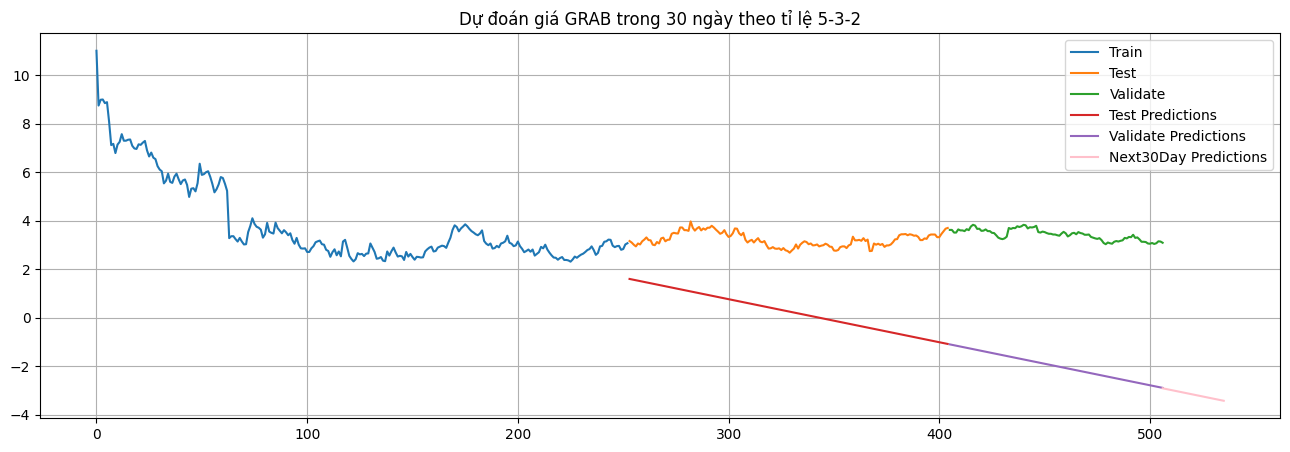

In [18]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá GRAB trong 30 ngày theo tỉ lệ 5-3-2")
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()